<a href="https://colab.research.google.com/github/chohu-boraaaa/R-practice/blob/main/%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88%ED%86%B5%EA%B3%84%EC%B6%94%EB%A1%A0_%EA%B3%BC%EC%A0%9C1%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **베이지안 통계추론 과제 1**

## **과제1_2019015007_김지희**

### **☑ 3단원 연습문제**

#### 3. 결합확률밀도함수가 아래와 같이 정의되는 두 변수 $x$, $y$가 있다.
$$f_{XY}(x,y)=x-y, 1≤x≤2, 0≤y≤1$$
#### $X$와 $Y$의 주변확률밀도함수를 구하고 $X$와 $Y$가 서로 독립인지 아닌지 밝혀라.


---







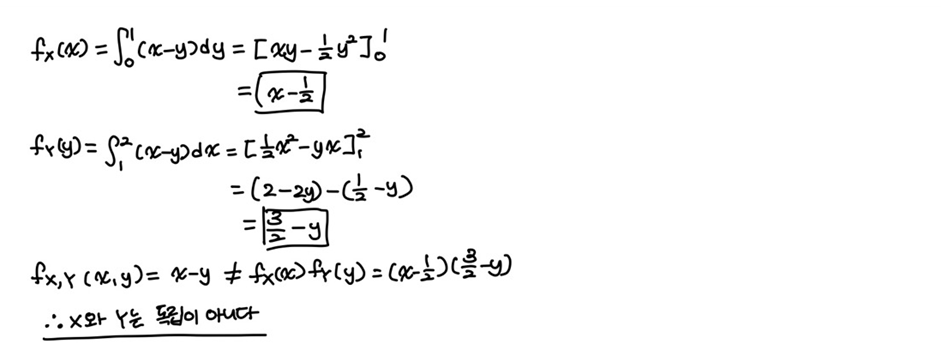

#### 5. 4번 문제에서
#### (1) 조건부 확률 $P((X_1,...,X_5)=(1,1,0,0,1|θ=0.5)$은 얼마인가?


---



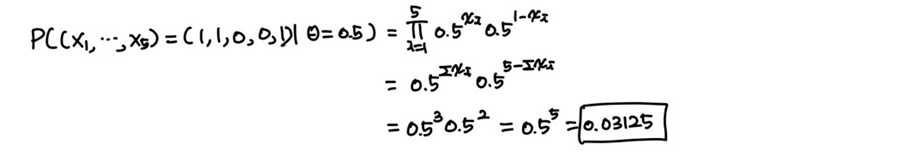

#### (2) 주변확률 $P((X_1,...,X_5)=(1,1,0,0,1)$)은 얼마인가?


---



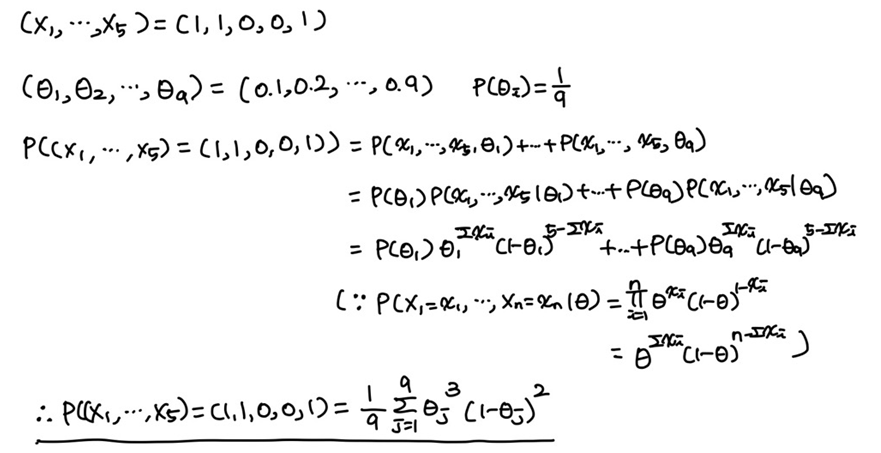

#### (3) $X_1,...,X_5$는 서로 교환가능한 변수인가?

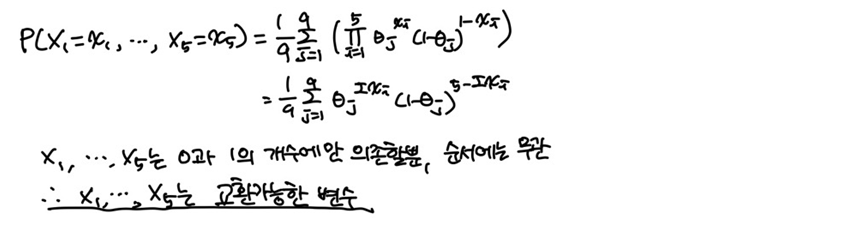

### **☑ 4단원 연습문제**

#### 1. $X_1, X_2, ..., X_7$이 독립적으로 $Ber(θ)$ 분포를 따른다. $X_1, X_2, ..., X_7$의 관측치가 $(1,1,0,1,0,0,0)$으로 주어질 때 $θ$의 우도함수를 구하고 최우추정치를 구하여라.


---



---



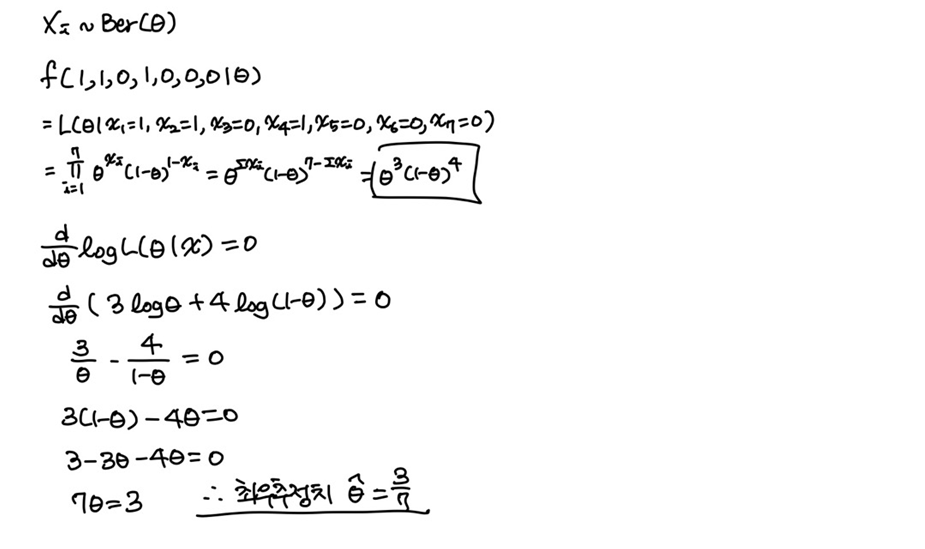

#### 3. $X_1,X_2,...,X_n$이 $Poi(θ)$를 따른다고 할 때 $\sum_{1}^{n} X_i$이 $θ$에 대한 충분통계량임으로 보여라.


---



---



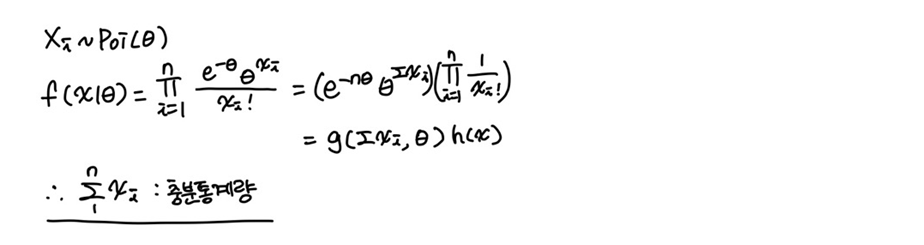

#### 6. 성공확률 $θ$를 가진 베르누이 시행을 20번 독립적으로 반복한 결과 5번의 성공을 얻었다. 그런데 성공확률 $θ$는 0.1, 0.2, ..., 0.9 중 하나의 값을 갖는데 사저넉으로 이들은 모두 같은 가능성을 가진다고 한다. 따라서 $θ_i = 0.1,0.2,...,0.9$에 대하여 $π(θ_i)=P(θ=θ_i)=1/9$의 이산균일분포를 가정하였다. 이상으로부터 $θ$의 사후분포를 구하고 $θ$의 95% 최대사후구간을 구하여라.


---

##### ▶ 사후분포 구하기

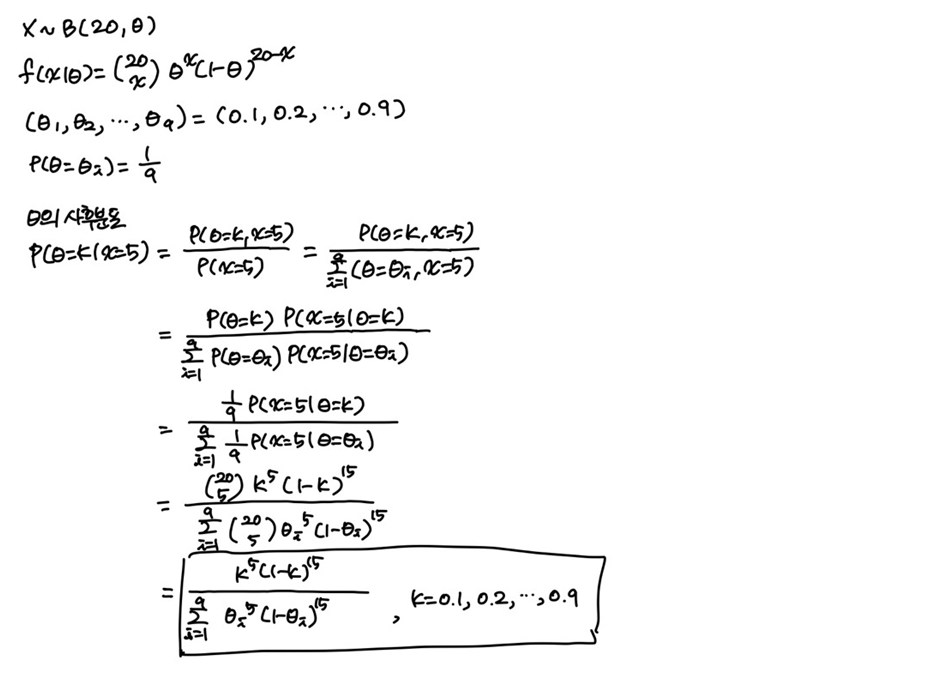

##### ▶ 최대사후구간 구하기

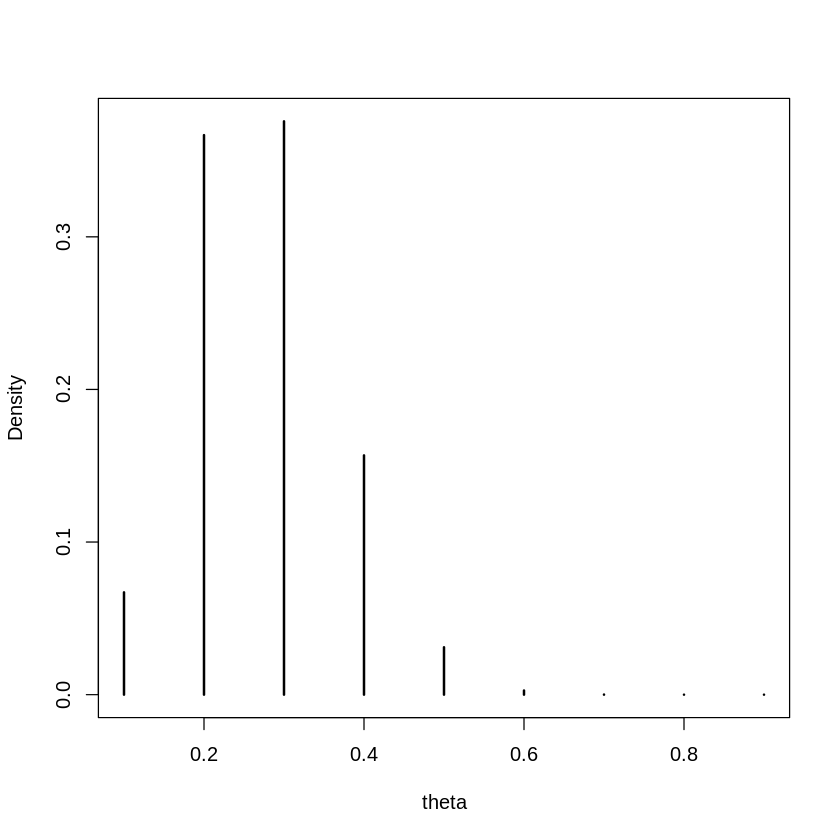

In [ ]:
# 우선 사후분포를  그려보았다.
f <- rep(NA, 9)
p <- seq(0.1, 0.9, by=0.1) # theta는 0.1, 0.2, ..., 0.9 중 하나의 값
for(i in 1:9) {
  f[i] <- p[i]^5*(1-p[i])^15
}
f <- f/sum(f)
plot(p, f, type="h", xlab="theta", ylab="Density", lwd=2)

In [ ]:
# theta가 이산형 변수이기 때문에 사후확률이 높은 theta값부터 
# 차례로 HPD 구간 포함시키다가 누적확률이 최초로 0.95를 초과하거나 같을 때 중단하면 된다.
# 즉, 앞서서 그린 사후분포에서 사후확률이 가장 높을 때인 theta가 0.3일 때부터 HPD 구간을 포함시키다가 
# 누적확률이 최초로 0.95를 초과하거나 같을 중단하면 된다.
f1 <- sort(f, decreasing=T) # 내림차순정렬
f1_sum <- 0
A <- c()

for(i in 1:9) {
  f1_sum = f1_sum + f1[i]
  A <- c(A, f1[i])
  if (f1_sum >= 0.95){
    break
  }
}

# 최대사후구간
interval <-c(min(p[which(f %in% A)]), max(p[which(f %in% A)]))
interval

[1] 0.1 0.4

- 따라서, 위의 결과에 따르면 θ의 95% 최대사후구간은 [0.1, 0.4] 이다.

In [ ]:
# HPDgird 방법으로도 최대사후구간을 구해보도록 하자.
HPDgrid=function(prob,level=0.95){
  prob.sort=sort(prob, decreasing=T)
  M=min( which(cumsum(prob.sort)>= level))
  height=prob.sort[M]
  HPD.index=which( prob >= height)
  HPD.level=sum(prob[HPD.index])
  res=list(index=HPD.index, level=HPD.level)
  return(res)
}

theta=seq(0.1,0.9,by=0.1) # theta는 0.1, 0.2, ..., 0.9 중 하나의 값
prob=theta^5*(1-theta)^15 # 사후분포 정의에 필요한 부분
prob=prob/sum(prob) # 이 부분이 있어야 prob의 합이 1이 됨
HPD=HPDgrid(prob, 0.95)
# 최대사후구간
HPDgrid.hat=c( min(theta[HPD$index]), max(theta[HPD$index]) )
HPDgrid.hat

[1] 0.1 0.4

- 마찬가지로, HPDgrid 방법을 이용했을때도 θ의 95% 최대사후구간은 [0.1, 0.4] 이다.

### **☑ 5단원 연습문제**

#### 2. MP3를 생산하는 공장에서 그동안 불량률의 평균이 0.2, 분산이 0.05였다. 최근에 임의로 10개를 조사한 결과 2개가 불량이었다.

#### (1) 불량률에 대한 사전분포로 베타분포를 가정할 때 예전 정보를 이용하여 사전분포의 모수를 정하고 이 사전분포를 사용하여 불량률 $θ$의 사후분포를 구하여라.


---

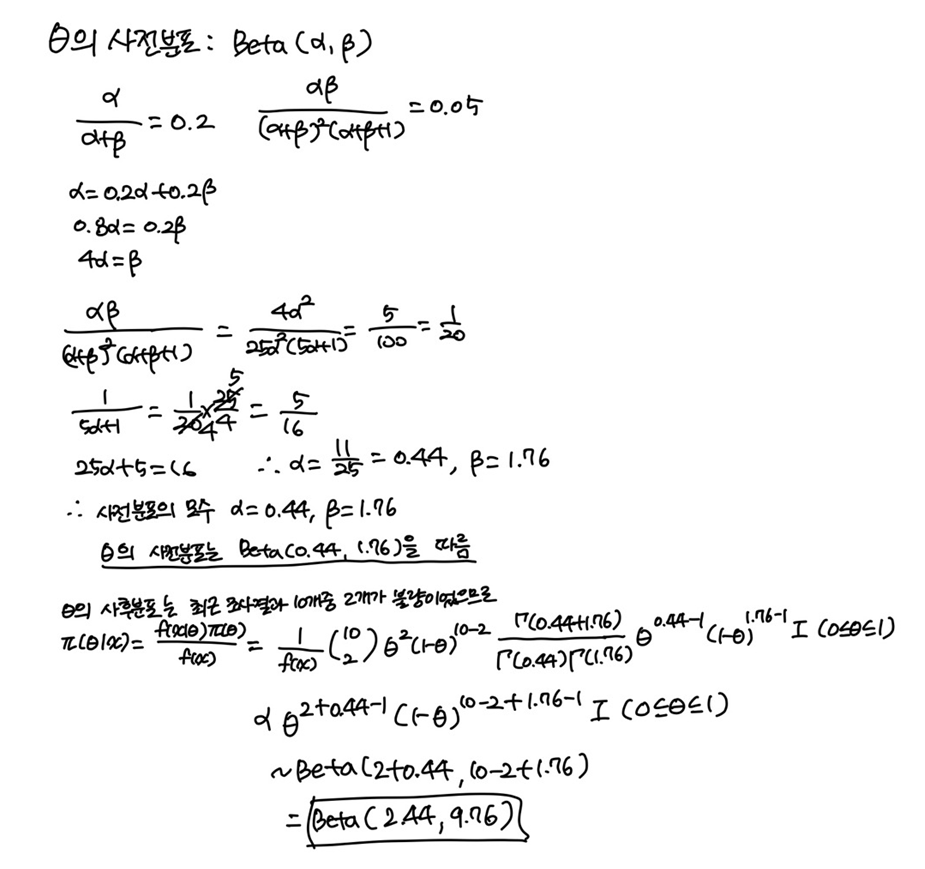

#### (2) 사전밀도함수와 사후밀도함수를 겹쳐 그리고 해석하라.


---



---



In [ ]:
# theta ~ Beta(0.44, 1.76)
a=0.44; b=1.76
# X|theta ~ B(n, theta)
n=10; x=2
theta = seq(0,1,length=50)
# 사전분포
prior.theta = dbeta(theta, a, b)
# 사후분포
post.theta = dbeta(theta, a+x, b+n-x)

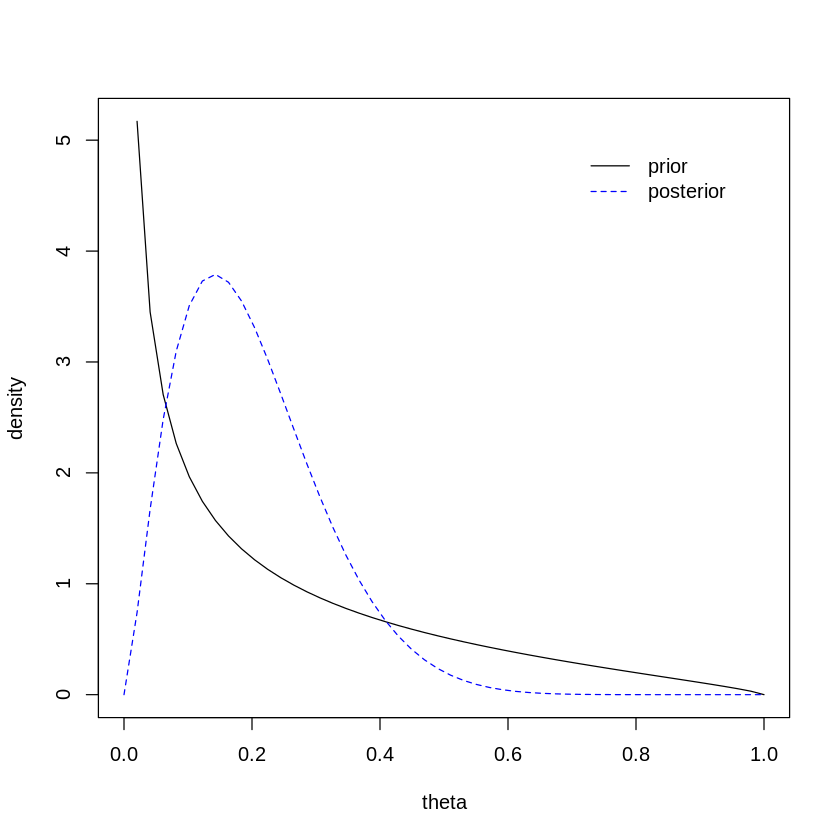

In [ ]:
plot(theta, prior.theta, ylab="density", type="l")
lines(theta, post.theta, col="blue", lty=2)
legend(0.7, 5, legend=c('prior', 'posterior'), lty=c(1,2), col=c("black", "blue"), bty='n')

In [ ]:
# 가장 높은 사후확률값을 가지는 theta
theta[which.max(post.theta)]

[1] 0.1428571

- 해석 : 사전밀도함수는 세타가 0에 가까울수록 확률값이 높아진데에 비해 사후밀도함수는 10개의 자료중 2개가 불량인 정보가 추가됨으로써 가장 확률값이 높은 지점인 세타가 약 0.14로 0.2 쪽으로 많이 이동한 것을 확인할 수 있다.

#### 4. 협심증 환자 12명을 대상으로 수술 후 후유증에 대하여 조사한 결과, 3명이 가슴통증 등 후유증을 보였다. 후유증의 비율 $θ$에 대한 사전정보가 전혀 없다고 할 때, 13번째 환자가 후유증을 보일 예측확률을 구하라.


---



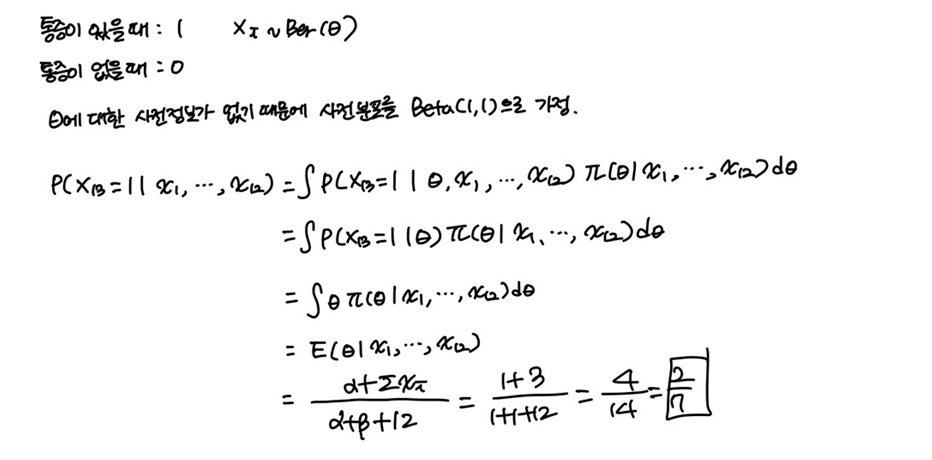